In [35]:
import pandas as pd
import numpy as np
import random as rnd
from scipy.io.arff import loadarff

import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8, 5)

from sklearn.ensemble import BaggingClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier


from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, auc, confusion_matrix, f1_score

# model evaluation calculate and score
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score,  mean_squared_error

# plot metrics model answer(metrics)
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve

# model evaluation 
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.preprocessing import LabelBinarizer


from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.dummy import DummyClassifier
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
#import umap

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('whitegrid')

import warnings
warnings.filterwarnings('ignore')

from tqdm import tqdm

# import some dependencies to plot

from plotly.offline import iplot
# init_notebook_mode(connected=True)
import plotly.graph_objs as go

from sklearn.model_selection import train_test_split, KFold, cross_val_score

# machine learning model
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
# boosting
from xgboost import XGBClassifier
from xgboost import plot_importance
from matplotlib import pyplot
from sklearn.feature_selection import SelectFromModel

# Import for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [36]:
df_data = pd.read_csv('data/cleaned/Elasticsearch-0.90.11-Unified.csv')
df_data

,Unnamed: 0,CC,CCL,CCO,CI,CLC,CLLC,LDC,LLDC,LCOM5,...,TNLM,TNLPA,TNLPM,TNLS,TNM,TNOS,TNPA,TNPM,TNS,bug
0,0,0.000000,0,0,0,0.000000,0.000000,0,0,4,...,7,0,6,0,7,7,0,6,0,0
1,1,0.310324,25,321,71,0.206629,0.294925,667,645,1,...,132,0,87,1,602,1322,0,349,32,0
2,2,1.000000,1,5,1,1.000000,1.000000,11,11,1,...,1,0,1,0,1,7,0,1,0,0
3,3,0.389344,3,13,3,0.461538,0.450980,24,23,1,...,2,0,1,0,2,28,0,1,0,0
4,5,0.000000,0,0,0,0.000000,0.000000,0,0,0,...,1,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5903,6474,0.000000,0,0,0,0.000000,0.000000,0,0,1,...,10,0,8,0,17,10,0,15,0,0
5904,6476,0.000000,0,0,0,0.000000,0.000000,0,0,1,...,1,0,0,0,23,1,0,1,0,0
5905,6477,0.000000,0,0,0,0.000000,0.000000,0,0,3,...,7,0,4,0,26,15,0,17,0,0
5906,6478,0.000000,0,0,0,0.000000,0.000000,0,0,1,...,1,0,1,0,1,2,0,1,0,0


In [37]:
df_data = df_data.iloc[:, 1:]

In [38]:
df_data.info() #informs about the data (memory usage, data types etc.)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5908 entries, 0 to 5907
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CC      5908 non-null   float64
 1   CCL     5908 non-null   int64  
 2   CCO     5908 non-null   int64  
 3   CI      5908 non-null   int64  
 4   CLC     5908 non-null   float64
 5   CLLC    5908 non-null   float64
 6   LDC     5908 non-null   int64  
 7   LLDC    5908 non-null   int64  
 8   LCOM5   5908 non-null   int64  
 9   NL      5908 non-null   int64  
 10  NLE     5908 non-null   int64  
 11  WMC     5908 non-null   int64  
 12  CBO     5908 non-null   int64  
 13  CBOI    5908 non-null   int64  
 14  NII     5908 non-null   int64  
 15  NOI     5908 non-null   int64  
 16  RFC     5908 non-null   int64  
 17  AD      5908 non-null   float64
 18  CD      5908 non-null   float64
 19  CLOC    5908 non-null   int64  
 20  DLOC    5908 non-null   int64  
 21  PDA     5908 non-null   int64  
 22  

In [39]:
df_data.describe() #shows simple statistics (min, max, mean, etc.)

,CC,CCL,CCO,CI,CLC,CLLC,LDC,LLDC,LCOM5,NL,...,TNLM,TNLPA,TNLPM,TNLS,TNM,TNOS,TNPA,TNPM,TNS,bug
count,5908.000000,5908.000000,5908.000000,5908.000000,5908.000000,5908.000000,5908.000000,5908.000000,5908.000000,5908.000000,...,5908.000000,5908.000000,5908.000000,5908.000000,5908.000000,5908.000000,5908.000000,5908.000000,5908.000000,5908.000000
mean,0.129180,0.768619,3.710731,1.337678,0.112583,0.119398,12.783683,11.443297,1.738152,1.355281,...,6.921124,0.370853,5.726473,0.219025,17.368483,34.089709,2.448544,12.826676,0.574475,0.114760
std,0.275333,2.677291,26.013522,7.258735,0.253605,0.260358,54.025268,47.475775,3.351834,2.402853,...,11.653897,2.100427,10.001676,1.573792,46.134854,84.006449,6.365183,29.419594,3.071526,0.318759
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,2.000000,0.000000,1.000000,0.000000,3.000000,3.000000,0.000000,2.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,3.000000,0.000000,3.000000,0.000000,9.000000,11.000000,0.000000,6.000000,0.000000,0.000000
75%,0.043741,1.000000,1.000000,1.000000,0.036520,0.045184,6.000000,6.000000,2.000000,2.000000,...,8.000000,0.000000,6.000000,0.000000,21.000000,33.000000,1.000000,15.000000,0.000000,0.000000
max,1.000000,54.000000,1299.000000,191.000000,1.000000,1.000000,1101.000000,1096.000000,137.000000,49.000000,...,308.000000,120.000000,212.000000,78.000000,3004.000000,2680.000000,120.000000,1812.000000,167.000000,1.000000


In [40]:
df_data.shape

(5908, 61)

In [41]:
X = df_data.iloc[:, 0:-1]
y = df_data["bug"]

#y = df_data.pop('Defective')
#X = df_data

print("X:", X.shape)
print("y:", y.shape)

X: (5908, 60)
y: (5908,)


In [42]:
X.describe() #shows simple statistics (min, max, mean, etc.)

,CC,CCL,CCO,CI,CLC,CLLC,LDC,LLDC,LCOM5,NL,...,TNLG,TNLM,TNLPA,TNLPM,TNLS,TNM,TNOS,TNPA,TNPM,TNS
count,5908.000000,5908.000000,5908.000000,5908.000000,5908.000000,5908.000000,5908.000000,5908.000000,5908.000000,5908.000000,...,5908.000000,5908.000000,5908.000000,5908.000000,5908.000000,5908.000000,5908.000000,5908.000000,5908.000000,5908.000000
mean,0.129180,0.768619,3.710731,1.337678,0.112583,0.119398,12.783683,11.443297,1.738152,1.355281,...,0.545870,6.921124,0.370853,5.726473,0.219025,17.368483,34.089709,2.448544,12.826676,0.574475
std,0.275333,2.677291,26.013522,7.258735,0.253605,0.260358,54.025268,47.475775,3.351834,2.402853,...,1.979776,11.653897,2.100427,10.001676,1.573792,46.134854,84.006449,6.365183,29.419594,3.071526
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,2.000000,0.000000,1.000000,0.000000,3.000000,3.000000,0.000000,2.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,3.000000,0.000000,3.000000,0.000000,9.000000,11.000000,0.000000,6.000000,0.000000
75%,0.043741,1.000000,1.000000,1.000000,0.036520,0.045184,6.000000,6.000000,2.000000,2.000000,...,0.000000,8.000000,0.000000,6.000000,0.000000,21.000000,33.000000,1.000000,15.000000,0.000000
max,1.000000,54.000000,1299.000000,191.000000,1.000000,1.000000,1101.000000,1096.000000,137.000000,49.000000,...,33.000000,308.000000,120.000000,212.000000,78.000000,3004.000000,2680.000000,120.000000,1812.000000,167.000000


In [20]:
#bug distribution

Classes: [0, 1]
Counts: [5230, 678]


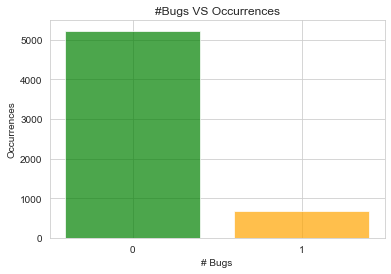

In [43]:
unique, counts = np.unique(y, return_counts=True)
print("Classes:", unique.tolist())
print("Counts:", counts.tolist())

plt.bar(unique, counts, color=['g', 'orange', 'r'], alpha=0.7)
plt.title("#Bugs VS Occurrences")
plt.xticks(range(len(unique)))
plt.ylabel("Occurrences")
plt.xlabel("# Bugs");

In [44]:
# save the dataset for c5
filename = 'Elasticsearch-0.90.11-Unified.csv'
df_data.to_csv('data/cleaned/baseline/{}'.format(filename),sep=',')

In [45]:
validation_size = 0.3
random_seed=7

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=7)
X_cv, X_test, y_cv, y_test = train_test_split(X_test, y_test, test_size=0.5)
print("Train:", X_train.shape, y_train.shape,
      "Test:", X_test.shape, y_test.shape,
      "Cross Validation", X_cv.shape, y_cv.shape)


Train: (4135, 60) (4135,) Test: (887, 60) (887,) Cross Validation (886, 60) (886,)


In [46]:
def Modeler(model, X_train, y_train, X_cv, y_cv, params, scale=False, n_jobs=True, pca=False):
    
    if scale & pca:
        pipeline = Pipeline([
            ('scale', StandardScaler()),
            ('dim_reduct', PCA(n_components=4)),
            ('clf', model())])
        print("Scaling and dim reduct...")
        
    elif scale:
        pipeline = Pipeline([ ('scale', StandardScaler()), ('clf', model())])
        
    elif pca:
        pipeline = Pipeline([
        ('dim_reduct', PCA(n_components=pca)),
        ('clf', model())])
    else:
        pipeline = Pipeline([('clf', model())])
        
    grid = GridSearchCV(pipeline, param_grid = params, cv=5, n_jobs=4, refit=True)
    grid.fit(X_cv, y_cv)
    
    best_prameters = {}
    for k, v in grid.best_params_.items():
        best_prameters[k[5:]] = v

    if n_jobs:
        model = model(**best_prameters, n_jobs=4)
    else:
        model = model(**best_prameters)
   
    model.fit(X_train, y_train)
    
    print("Best Parameters for model:", best_prameters)

    return {
        "model": model, 
        "best_params":best_prameters
    }

In [47]:
# metrics method
def metrics_calculate(model_name, y_val, y_pred):
    '''
    0. basic metrics values ['accuracy', 'precision', 'recall', 'fpr', 'fnr', 'auc']
    1. classification report
    2. confusion matrix
    '''
    y_val = np.reshape(y_val, -1).astype(np.int32)
    y_pred = np.where(np.reshape(y_pred, -1) > 0.5, 1, 0)
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    tn, fp, fn, tp = confusion_matrix(y_val, y_pred,labels=[0,1]).ravel()
    fpr = fp / (tn + fp)
    fnr = fn / (tp + fn)
    auc = roc_auc_score(y_val, y_pred)
    print('Model:%s Acc:%.8f Prec:%.8f Recall:%.8f FNR:%.8f FPR:%.8f AUC:%.8f' % (model_name, accuracy, precision, recall, fnr, fpr, auc))
    print(model_name, 'classification report:\n', classification_report(y_val, y_pred))
    print(model_name, 'confusion_matrix:\n', confusion_matrix(y_val, y_pred))
    print('\n%s FNR:%.8f FPR:%.8f\n%s accuracy:%.8f' % (model_name, fnr, fpr, model_name, accuracy_score(y_pred,y_val)))

In [48]:
def model_eval(model, X_test, y_test, acc=True, recall_=True, auc_=True, plot_conf=True, plot_auc=True, f1=True, prop=False):
    
    res = [None, None, None, None] # Accuracy, auc_roc, f1_score, recall
    y_pred = model.predict(X_test)
    
    if prop:
        y_pred = np.where(y_pred > 0.5, 1, 0)
    
    if f1:
        f_sc = f1_score(y_test, y_pred, average='macro')
        res[2] = f_sc
        
    if acc:
        res[0] = accuracy_score(y_test, y_pred)
        print('accuracy:', res[0] * 100 ,'%')
              
    if recall_:
        res[3]= recall_score(y_test, y_pred, average='macro')
        print('recall:', res[3] * 100 ,'%')
              
    if auc_:
        lb = LabelBinarizer()
        lb.fit(y_test)

        truth = lb.transform(y_test)
        y_pred_encode = lb.transform(y_pred)
              
        res[1] = roc_auc_score(truth, y_pred_encode, average = 'macro')
        print('ROC:', res[1] * 100 ,'%')
              
    if plot_conf:
        fig, ax = plt.subplots(figsize=(10,6))

        conf = confusion_matrix(y_test, y_pred, labels=np.unique(y_test))
        sns.heatmap(conf, cmap= 'Set1', annot=True, cbar=False)
        plt.ylabel('Actual')
        plt.xlabel('Predicted')
        plt.title('Confusion Matrix');
    
    if plot_auc:
        fig, ax = plt.subplots(figsize=(10,6))

        if not auc_:
            lb = LabelBinarizer()
            lb.fit(y_test)

            truth = lb.transform(y_test)
            y_pred_encode = lb.transform(y_pred)

        fpr = [None, None, None]
        tpr = [None, None, None]
        auc_of_roc = [None, None, None]
        
        #n_classes = (0, 1)
        
        for i in range(0,1):
            fpr[i], tpr[i], _ = roc_curve(truth[:, i], y_pred_encode[:, i])
            auc_of_roc[i] = auc(fpr[i], tpr[i])
            
        plt.plot(fpr[0], tpr[0], label='0 - area under ROC = %0.3f' % auc_of_roc[0])

        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title("ROC AUC");
        plt.legend()

    return res

In [49]:
scores = {}

In [17]:
# classifiers baseline

In [79]:
#adaboost

In [50]:
# AdaBoostClassifier
ada_params = {
  #  'clf__learning_rate': [0.1, 0.5, 1.0],
  #  'clf__n_estimators': [100, 200]
}

ada = Modeler(AdaBoostClassifier, X_train, y_train, X_cv, y_cv, ada_params, scale=False, n_jobs=False)

Best Parameters for model: {}


accuracy: 89.85343855693348 %
recall: 62.35845295055822 %
ROC: 62.35845295055822 %


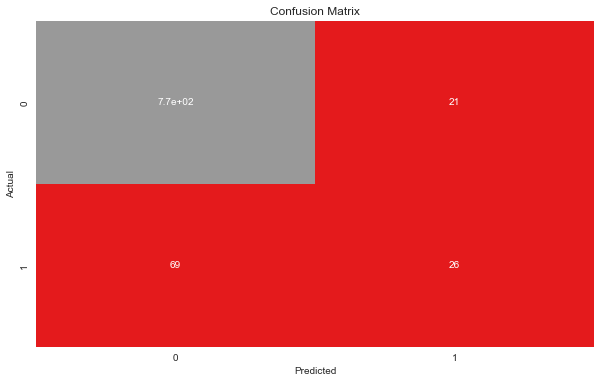

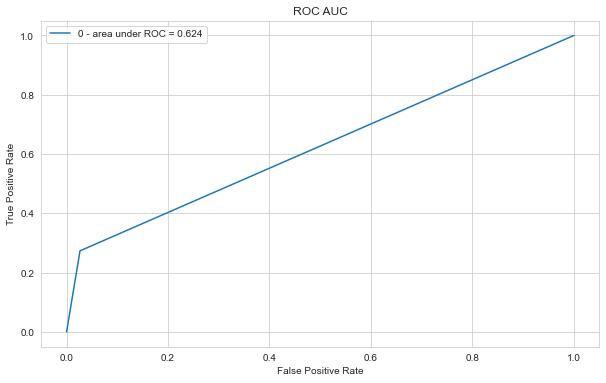

In [51]:
model_scoring = model_eval(ada["model"], X_test, y_test)
scores["AdaBoost Classifier | Binary"] = {"Accuracy": '{0:.2f}'.format(round(model_scoring[0], 4)*100),
                             #"ROC": '{0:.2f}'.format(round(model_scoring[1],4)*100),
                             "F1-Score": '{0:.2f}'.format(round(model_scoring[2],4)*100),
                            "Recall-Score": '{0:.2f}'.format(round(model_scoring[3],4)*100)}

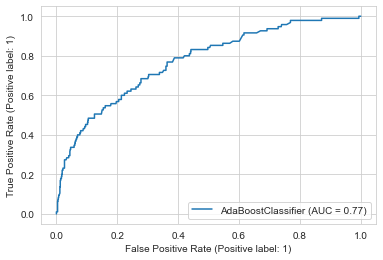

In [52]:
ROC_curve = plot_roc_curve(ada["model"], X_test, y_test)
scores["AdaBoost Classifier | Binary"]["AUC"] = '{0:.2f}'.format(round(ROC_curve.roc_auc,4)*100)

In [ ]:
#xgboost

In [53]:
xg_params = {
  #  'clf__max_depth': [8, 9],
  #  'clf__learning_rate': [0.1],
  #  'clf__n_estimators':[200],
  #  'clf__reg_alpha':[1.1],
  #  'clf__colsample_bytree':[0.8],
  #  'clf__subsample':[0.8, 0.9,],
}

xgboost = Modeler(XGBClassifier, X_train, y_train, X_cv, y_cv, xg_params, scale=False, n_jobs=5)

[22:04:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:04:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best Parameters for model: {}


accuracy: 89.40248027057497 %
recall: 65.34821903242955 %
ROC: 65.34821903242955 %


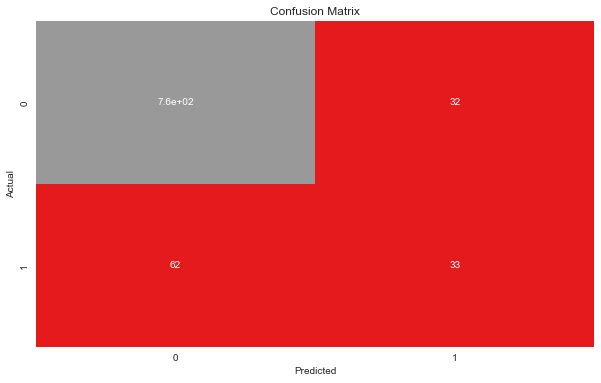

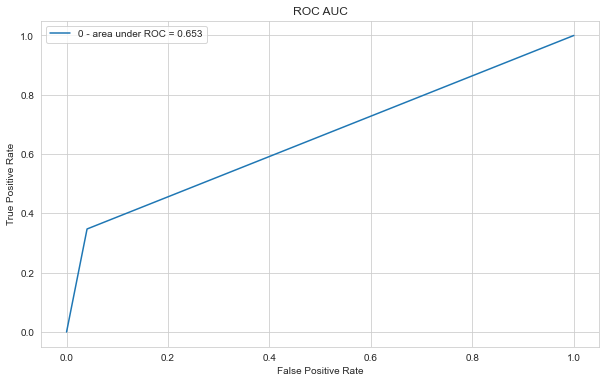

In [54]:
model_scoring = model_eval(xgboost["model"], X_test, y_test)
scores["XGBoost | Binary"] = {"Accuracy": '{0:.2f}'.format(round(model_scoring[0], 4)*100),
                             #"ROC": '{0:.2f}'.format(round(model_scoring[1],4)*100),
                             "F1-Score": '{0:.2f}'.format(round(model_scoring[2],4)*100),
                             "Recall-Score": '{0:.2f}'.format(round(model_scoring[3],4)*100)}

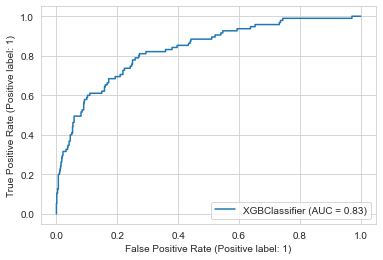

In [55]:
ROC_curve = plot_roc_curve(xgboost["model"], X_test, y_test)
scores["XGBoost | Binary"]["AUC"] = '{0:.2f}'.format(round(ROC_curve.roc_auc,4)*100)

In [ ]:
# Random Forest

In [56]:
rfc_params = {
   # 'clf__n_estimators'      : [200, 500],
   # 'clf__max_depth'         : [10, 20],
   # 'clf__max_features': [1.0, 0.7, 0.4],
   # 'clf__criterion' :['gini', 'entropy']
}

rfc = Modeler(RandomForestClassifier, X_train, y_train, X_cv, y_cv, rfc_params, scale=False) 

Best Parameters for model: {}


accuracy: 90.52987598647125 %
recall: 64.58997873471557 %
ROC: 64.58997873471559 %


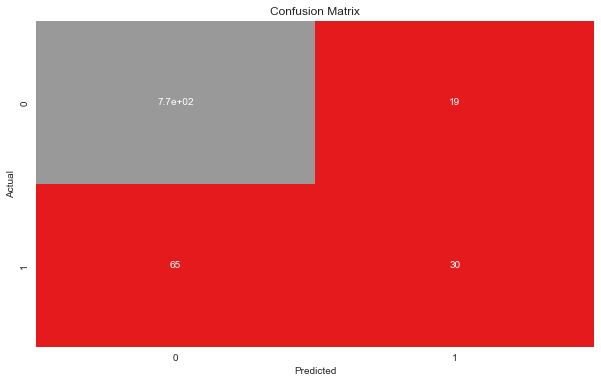

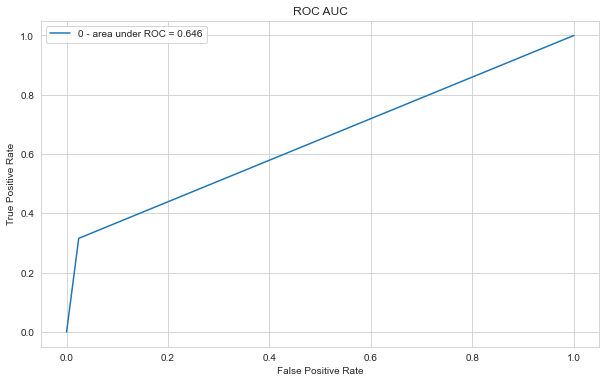

In [57]:
model_scoring = model_eval(rfc["model"], X_test, y_test)
scores["Random Forest | Binary"] = {"Accuracy": '{0:.2f}'.format(round(model_scoring[0], 4)*100),
                             #"ROC": '{0:.2f}'.format(round(model_scoring[1],4)*100),
                             "F1-Score": '{0:.2f}'.format(round(model_scoring[2],4)*100),
                           "Recall-Score": '{0:.2f}'.format(round(model_scoring[3],4)*100)}

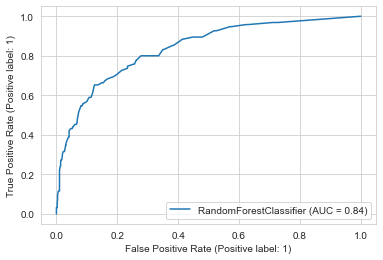

In [58]:
ROC_curve = plot_roc_curve(rfc["model"], X_test, y_test)
scores["Random Forest | Binary"]["AUC"] = '{0:.2f}'.format(round(ROC_curve.roc_auc,4)*100)

In [84]:
#svm

In [59]:
# SVC()
svc_params = {
   # 'clf__C': [0.1, 1, 10],
   # 'clf__kernel': ['linear', 'rbf'],
   # 'clf__gamma':[1, 0.01]
}

svc = Modeler(SVC, X_train, y_train, X_cv, y_cv, svc_params, scale=False, n_jobs=False)

Best Parameters for model: {}


accuracy: 89.74069898534385 %
recall: 52.10526315789473 %
ROC: 52.10526315789473 %


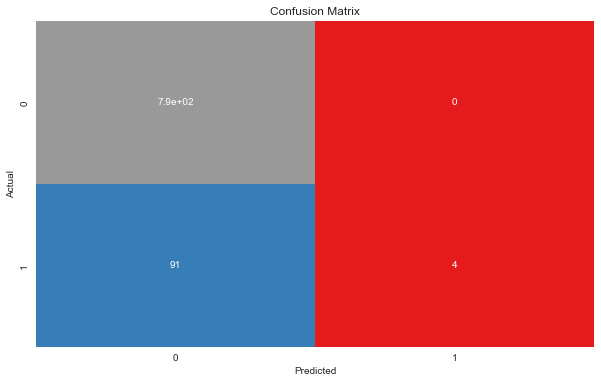

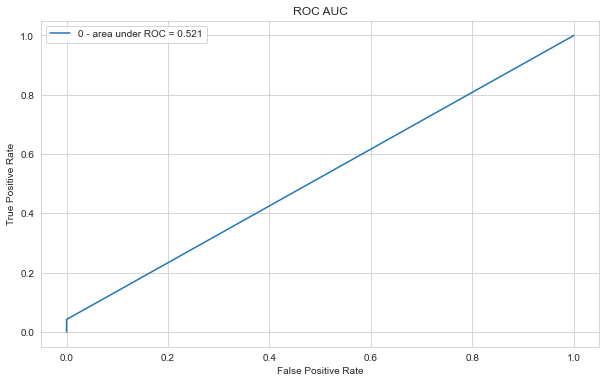

In [60]:
model_scoring = model_eval(svc["model"], X_test, y_test)
scores["Support-Vector Machine | Binary"] = {"Accuracy": '{0:.2f}'.format(round(model_scoring[0], 4)*100),
                             #"ROC": '{0:.2f}'.format(round(model_scoring[1],4)*100),
                             "F1-Score": '{0:.2f}'.format(round(model_scoring[2],4)*100),
                             "Recall-Score": '{0:.2f}'.format(round(model_scoring[3],4)*100)}

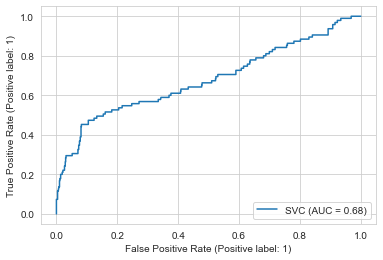

In [61]:
ROC_curve = plot_roc_curve(svc["model"], X_test, y_test)
scores["Support-Vector Machine | Binary"]["AUC"] = '{0:.2f}'.format(round(ROC_curve.roc_auc,4)*100)

In [ ]:
# naive_bayes

In [62]:
naive_bayes = Modeler(GaussianNB, X_train, y_train, X_cv, y_cv,params={}, scale=False, n_jobs=False)

Best Parameters for model: {}


accuracy: 68.32018038331455 %
recall: 69.29093567251462 %
ROC: 69.29093567251462 %


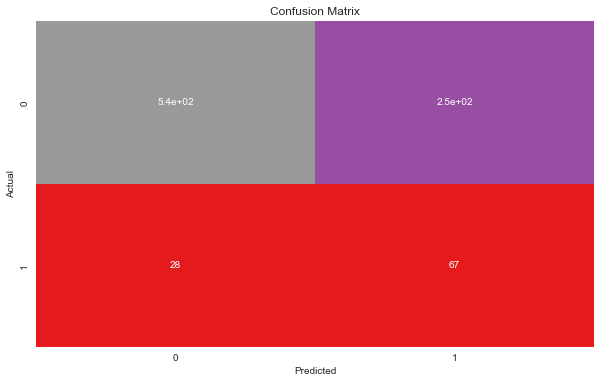

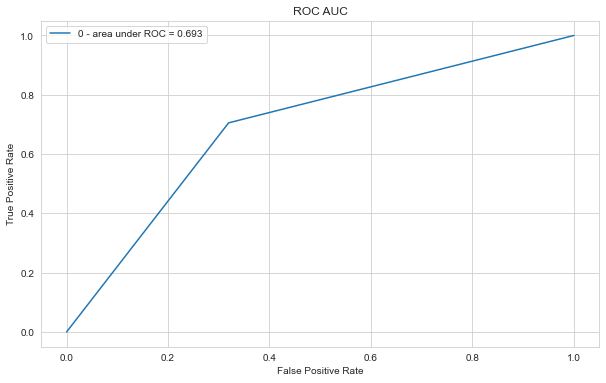

In [63]:
model_scoring = model_eval(naive_bayes["model"], X_test, y_test)
scores["Naive Bayes | Binary"] = {"Accuracy": '{0:.2f}'.format(round(model_scoring[0], 4)*100),
                             #"ROC": '{0:.2f}'.format(round(model_scoring[1],4)*100),
                             "F1-Score": '{0:.2f}'.format(round(model_scoring[2],4)*100),
                            "Recall-Score": '{0:.2f}'.format(round(model_scoring[3],4)*100)}

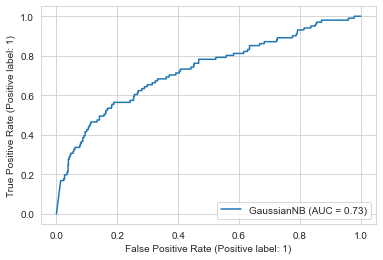

In [64]:
ROC_curve = plot_roc_curve(naive_bayes["model"], X_cv, y_cv)
scores["Naive Bayes | Binary"]["AUC"] = '{0:.2f}'.format(round(ROC_curve.roc_auc,4)*100)

In [65]:
score_df = pd.DataFrame.from_dict(scores).T
score_df= score_df.sort_values('Accuracy', ascending=False)

In [66]:
score_df

,Accuracy,F1-Score,Recall-Score,AUC
Random Forest | Binary,90.53,68.26,64.59,83.80
AdaBoost Classifier | Binary,89.85,65.55,62.36,77.19
Support-Vector Machine | Binary,89.74,51.32,52.11,67.84
XGBoost | Binary,89.40,67.71,65.35,83.18
Naive Bayes | Binary,68.32,55.81,69.29,72.74
